Person object parameters:

Joes:
has a state: Suceptable, Infected, Recovered
has number of days sick
chance of being sick



In [1]:
import numpy as np
import random

my_array = np.array

In [30]:
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.radius = 6
        self.sickness_rate = 500


        self.Interaction = []
        
        self.location = [random.randint(0,1000), random.randint(0,1000)]
        
        X_LOCATION = self.location[0]
        Y_LOCATION = self.location[1]
        
    
    def set_sickness_rate(self, distance):
        self.sickness_rate = 500/(distance+1)
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
    
    def update_days_sick(self):
        if (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
            
            
    def roll_for_infection(self):
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            self.infect(4)
            
        

## We need "something" to manage and hold our People

In [67]:
class Population:
    def __init__(self, number=100): 
        self.People = []
        self.number = number
        
        if (number < 100):
            self.number = 100
        
        ##build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0,number):
            p = Person()
            self.People.append(p)
            
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if (j.status == "Infected"):
                sick_Count = sick_Count + 1
                
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if (j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
        
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if (j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    ## Here's the brains of the Population class (and our code)
    ## the update will be ran everyday (meaning, every iteration of our while loop)
    ## build interaction tables (who interacted with whom)
    ## if marked sick they must roll to see if (one per interaction)
    ## for example if I interacted with x people within 6 feet, each of them must roll and vice versa if they
    ## they were marked as infected
    

                    
    def update(self):
        ## people who are might get sick
        might_Get_Sick = []
        
        for person in self.People:
            
            #clear out your interactions per day
            person.Interaction = []
            
            ##These are people that you interact with

            for j in self.People:
                j.Interaction = []
            #if the distance between 2 people is less than 6, add each person to one another's Interaction table
                x_distance = (abs(j.location[0] - person.location[0]))
                y_distance = (abs(j.location[1] - person.location[1]))
                distance= min(x_distance, y_distance)
                person.set_sickness_rate(distance)
                j.set_sickness_rate(distance)
                if ((x_distance< j.radius) or (y_distance< j.radius)) :
                    person.Interaction.append(j)
                    j.Interaction.append(person)
                    
                
            ##if "person" is Infected, every single person they interacted with might get sick
            if (person.status == "Infected"):
                person.update_days_sick()
                
                for m in person.Interaction:
                    if (m.status == "Susceptible"): #only susceptible people can get sick
                        might_Get_Sick.append(m)
            
            ##if "person" is susceptible and they interact w/ someone who is "infected" 
            ##person gets added to the "might get sick"
            if (person.status == "Susceptible"):
                for m in person.Interaction:
                    if (m.status == "Infected"):
                        might_Get_Sick.append(person)
            
        ##Now! We're going to roll through our "Might Get Sick" and they each roll a die
        ##this is only a list of susceptible people
        for p in might_Get_Sick:
            p.roll_for_infection()
        

## Lets build a population
Build a population of 1000 with 1 initally infected people:
`myCommunity = Population(1000,10)`

In [68]:
myCommunity = Population(1000)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
while (number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    my_plot.append([day, number_sick, number_recovered])
    print ("day:", day, "Number of sick:", number_sick)

    day = day+1
    myCommunity.update()

#print ("day:", day, "Number of sick:", myCommunity.number_of_sick())
print ("Number recovered:", myCommunity.number_of_recovered())
print ("Number susceptible:", myCommunity.number_of_susceptible())

print (my_plot)

day: 0 Number of sick: 1
day: 1 Number of sick: 4
day: 2 Number of sick: 25
day: 3 Number of sick: 67
day: 4 Number of sick: 134
day: 5 Number of sick: 228
day: 6 Number of sick: 323
day: 7 Number of sick: 394
day: 8 Number of sick: 425
day: 9 Number of sick: 408
day: 10 Number of sick: 370
day: 11 Number of sick: 312
day: 12 Number of sick: 251
day: 13 Number of sick: 190
day: 14 Number of sick: 123
day: 15 Number of sick: 81
day: 16 Number of sick: 52
day: 17 Number of sick: 35
day: 18 Number of sick: 28
day: 19 Number of sick: 19
day: 20 Number of sick: 12
day: 21 Number of sick: 10
day: 22 Number of sick: 7
day: 23 Number of sick: 5
day: 24 Number of sick: 4
day: 25 Number of sick: 3
day: 26 Number of sick: 2
day: 27 Number of sick: 0
Number recovered: 878
Number susceptible: 123
[[0, 1, 0], [1, 4, 0], [2, 25, 0], [3, 67, 0], [4, 134, 0], [5, 228, 4], [6, 323, 25], [7, 394, 67], [8, 425, 134], [9, 408, 232], [10, 370, 348], [11, 312, 461], [12, 251, 559], [13, 190, 640], [14, 123, 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.DataFrame(my_plot, columns=['day','number_sick', 'number_recovered'])

In [ ]:
df

,day,number_sick,number_recovered
0,0,1,0
1,1,4,0
2,2,15,0
3,3,52,0
4,4,162,0
5,5,309,4
6,6,493,15
7,7,656,52
8,8,686,162
9,9,605,313


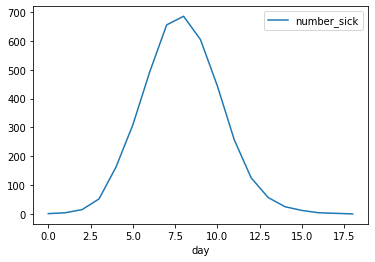

In [57]:
fig = plt.figure()
ax = plt.gca()
fig = df.plot(kind='line', x='day', y='number_sick', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

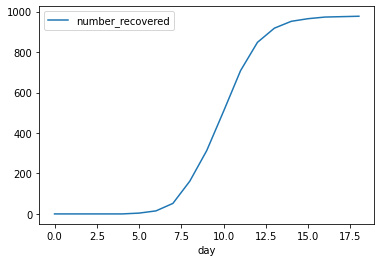

In [58]:
fig = plt.figure()
ax = plt.gca()
fig = df.plot(kind='line', x='day', y='number_recovered', ax=ax).get_figure()
plt.savefig('test.png', bbox_inches='tight')
plt.show()

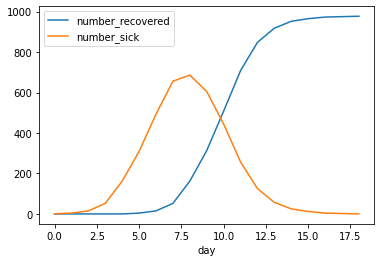

In [59]:
fig = plt.figure()
ax1 = plt.gca()
fig1 = df.plot(kind='line', x='day', y='number_recovered', ax=ax1).get_figure()
fig2 = df.plot(kind='line', x='day', y='number_sick', ax=ax1).get_figure()
plt.savefig('test.png')
plt.show()

In [ ]:
df.to_csv("mydata.csv")